<a href="https://colab.research.google.com/github/AneVillanueva/03MIAR_Algoritmos-de-optimizacion/blob/main/Algoritmos_Ane_Villanueva_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 2

<font color="gray">**Asignatura: Algoritmos de Optimización**

<font color="darkcyan">Alumna: Ane Villanueva Etxebarria

Link repositorio GitHub: https://github.com/AneVillanueva/03MIAR_Algoritmos-de-optimizacion
<br>
<hr>



In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

### 1. Descenso del gradiente - Ejemplo de clase
> <font color="gray">Algoritmo para aplicar el método del descenso del gradiente, para una función f dada


In [3]:
# Definimos la función y el gradiente:
f = lambda X: X[0]**2 + X[1]**2
df = lambda X: [2*X[0], 2*X[1]]

Solución: [1.62727527524838e-09, -3.1062575414968865e-09] 1.2296860735540971e-17


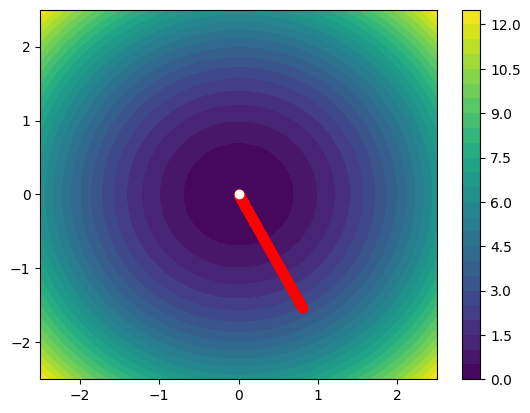

In [4]:
# Preparación de los datos para dibujar mapa de niveles de Z
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[ix, iy] = f([x,y])

# Gráfico del mapa de niveles de Z
contour = plt.contourf(X, Y, Z, resolucion)
plt.colorbar(contour)

# Generar punto de partida aleatorio
P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], 'o', c = 'red')

# Tasa de aprendizaje (TA)
TA = 0.001

# Realizamos iteraciones del algoritmo

for _ in range(10000):
  grad = df(P)
  P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
  plt.plot(P[0], P[1], 'o', c = 'red')

# El punto final lo indicamos en color blanco
plt.plot(P[0], P[1], 'o', c = 'white')

# Imprimimos el resultado final
print('Solución:', P, f(P))

En este caso, se puede observar que independientemente del punto de partida aleatorio generado, la función siempre converge al punto (0, 0).

En el gráfico generado en el posterior código, se visualiza en 3D la propia función f(x,y), para el rango [-10, 10] para x e y. En este gráfico, se puede observar que en el intervalo dibujado, (0, 0) es el único mínimo de la función.

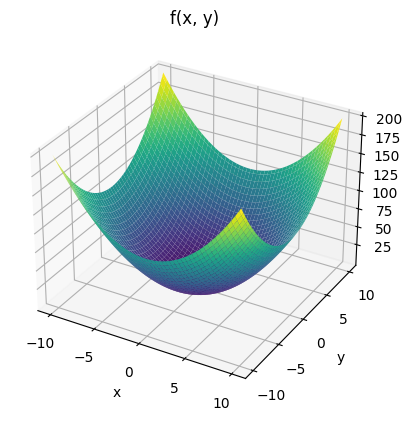

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos el rango de x e y, y los valores de z
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + Y**2

# Creamos le gráfico
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('f(x, y)')

plt.show()

### 2. Descenso del gradiente - Actividad individual
> <font color="gray">Algoritmo para aplicar el método del descenso del gradiente, para una función f dada


In [5]:
# Definimos la función y el gradiente:
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])

# Aproximamos el valor del gradiente en un punto por su definición:
def df(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it, th in enumerate(PUNTO):
    T[it] = T[it] + h
    grad[it] = (f(T) - f(PUNTO)) / h
  return grad

Solución: [-2.0350775852513605, 1.1680732463633166] -0.9998468494550266


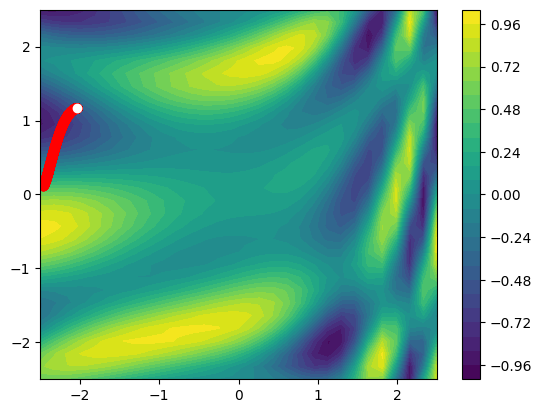

In [28]:
# Preparación de los datos para dibujar mapa de niveles de Z
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[ix, iy] = f([x,y])

# Gráfico del mapa de niveles de Z
contour = plt.contourf(X, Y, Z, resolucion)
plt.colorbar(contour)

# Generar punto de partida aleatorio
P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], 'o', c = 'red')

# Tasa de aprendizaje (TA)
TA = 0.001

# Realizamos iteraciones del algoritmo

for _ in range(10000):
  grad = df(P)
  P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
  plt.plot(P[0], P[1], 'o', c = 'red')

# El punto final lo indicamos en color blanco
plt.plot(P[0], P[1], 'o', c = 'white')

# Imprimimos el resultado final
print('Solución:', P, f(P))

Pese a que cada vez que ejecutamos la celda el algoritmo parece que converge, se puede observar que, en función del punto de partida aleatorio que se genere en cada ejecución, **la función converge a un punto diferente**, pero no siempre al mismo.


Esto sucede, a diferencia que en el caso resuelto en el ejemplo anterior, porque estamos trabajando con una función que **tiene múltiples mínimos locales**, lo que significa que hay varios puntos en el dominio de la función donde ésta alcanza su valor mínimo dentro de una determinada vecindad. Por ello, el algoritmo de descenso de gradiente converge a diferentes mínimos dependiendo del punto inicial elegido: es decir, converge a diferentes óptimos locales.

En el siguiente gráfico, se puede observar la naturaleza de la función f(x,y), en un rango de [-2, 2] para x e y:

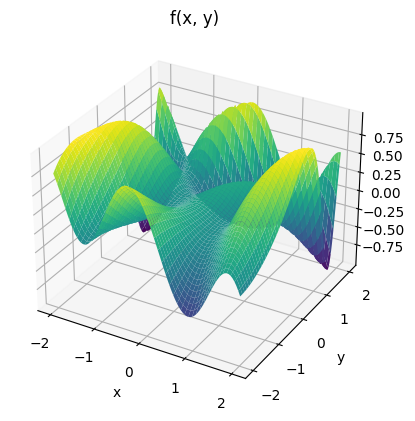

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos el rango de x e y, y los valores de z
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.sin(0.5 * X**2 - 0.25 * Y**2 + 3) * np.cos(2 * X + 1 -  np.e**Y)

# Creamos el gráfico
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('f(x, y)')

plt.show()